In [2]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import pandas as pd 
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

In [3]:
driver = webdriver.Edge()

In [4]:
url = " https://www.ycombinator.com/companies?batch=W24"
driver.get(url)

In [5]:
elements = driver.find_elements('css selector','a._company_99gj3_339')
link_list = []

for element in elements:
    href = element.get_attribute('href')
    link_list.append(href)

In [6]:
link_list

['https://www.ycombinator.com/companies/alacrity',
 'https://www.ycombinator.com/companies/parcelbio',
 'https://www.ycombinator.com/companies/k-scale-labs',
 'https://www.ycombinator.com/companies/marr-labs',
 'https://www.ycombinator.com/companies/forge-rewards',
 'https://www.ycombinator.com/companies/fancave',
 'https://www.ycombinator.com/companies/retailready',
 'https://www.ycombinator.com/companies/million',
 'https://www.ycombinator.com/companies/nowhouse',
 'https://www.ycombinator.com/companies/crux',
 'https://www.ycombinator.com/companies/reprompt',
 'https://www.ycombinator.com/companies/inspectmind-ai',
 'https://www.ycombinator.com/companies/yarn-2',
 'https://www.ycombinator.com/companies/blacksmith',
 'https://www.ycombinator.com/companies/crowdvolt',
 'https://www.ycombinator.com/companies/kater-ai',
 'https://www.ycombinator.com/companies/mathgptpro',
 'https://www.ycombinator.com/companies/quivr',
 'https://www.ycombinator.com/companies/dragoneye',
 'https://www.yc

In [7]:
def get_company_details(html):
    soup = BeautifulSoup(html, 'html.parser')
    company_name = soup.find('div', class_='text-lg font-bold').text.strip()
    location = soup.find('span', text='Location:').find_next_sibling('span').text.strip()
    team_size = soup.find('span', text='Team Size:').find_next_sibling('span').text.strip()
    founders = len(soup.find_all('h3', class_='text-lg font-bold'))
    return {
        'company_name': company_name,
        'location': location,
        'team_size': team_size,
        'founders': founders
    }

In [8]:
def scrape_links(links):
    data = []
    for link in links:
        response = requests.get(link)
        if response.status_code == 200:
            html = response.text
            company_details = get_company_details(html)
            data.append(company_details)
    return data

In [9]:
company_data = scrape_links(link_list)

C:\Users\Sushant\AppData\Local\Temp\ipykernel_70824\1933359274.py:4: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  location = soup.find('span', text='Location:').find_next_sibling('span').text.strip()
C:\Users\Sushant\AppData\Local\Temp\ipykernel_70824\1933359274.py:5: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  team_size = soup.find('span', text='Team Size:').find_next_sibling('span').text.strip()


In [10]:
for company in company_data:
    print("Company Name:", company['company_name'])
    print("Location:", company['location'])
    print("Team Size:", company['team_size'])
    print("Number of Founders:", company['founders'])
    print()

Company Name: Alacrity
Location: San Francisco
Team Size: 2
Number of Founders: 2

Company Name: ParcelBio
Location: San Francisco
Team Size: 2
Number of Founders: 2

Company Name: K-Scale Labs
Location: New York
Team Size: 3
Number of Founders: 3

Company Name: Marr Labs
Location: San Francisco
Team Size: 6
Number of Founders: 2

Company Name: Forge Rewards
Location: San Francisco
Team Size: 2
Number of Founders: 2

Company Name: FanCave
Location: Roeland Park, KS
Team Size: 2
Number of Founders: 2

Company Name: RetailReady
Location: 
Team Size: 3
Number of Founders: 2

Company Name: Million
Location: San Francisco
Team Size: 3
Number of Founders: 3

Company Name: NowHouse
Location: 
Team Size: 0
Number of Founders: 1

Company Name: Crux
Location: 
Team Size: 7
Number of Founders: 3

Company Name: Reprompt
Location: San Francisco
Team Size: 2
Number of Founders: 2

Company Name: InspectMind AI
Location: San Francisco
Team Size: 2
Number of Founders: 2

Company Name: Yarn
Location: Sa

In [11]:
data_df=pd.DataFrame(company_data)

In [12]:
data_df

,company_name,location,team_size,founders
0,Alacrity,San Francisco,2,2
1,ParcelBio,San Francisco,2,2
2,K-Scale Labs,New York,3,3
3,Marr Labs,San Francisco,6,2
4,Forge Rewards,San Francisco,2,2
...,...,...,...,...
243,Lantern,San Francisco,3,2
244,Danswer,,2,2
245,Yenmo,"Bengaluru, India",5,2
246,GovernGPT,"Toronto, Canada",2,2


In [13]:
data_df.isna().sum()

company_name    0
location        0
team_size       0
founders        0
dtype: int64

In [14]:
team_counts = data_df['team_size'].value_counts()
team_counts = team_counts

In [15]:
team_counts

team_size
2     138
3      64
5      10
1      10
4       8
6       4
0       2
13      2
10      2
11      2
8       2
12      2
7       1
18      1
Name: count, dtype: int64

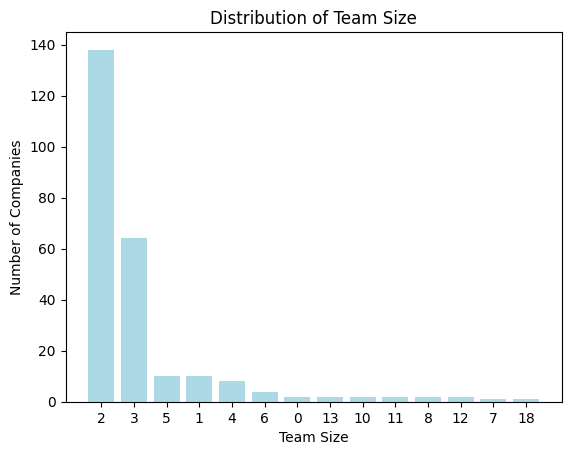

In [16]:
plt.bar(team_counts.index, team_counts.values, color='lightblue')
plt.xlabel('Team Size')
plt.ylabel('Number of Companies')
plt.title('Distribution of Team Size')
plt.show()

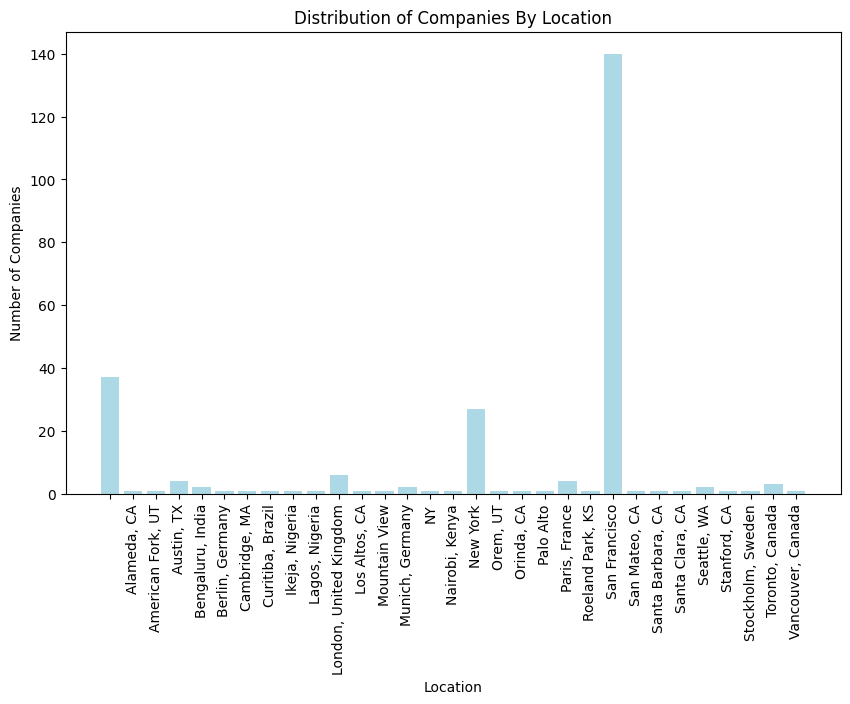

In [17]:
cmp_by_loc = data_df['location'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(cmp_by_loc.index, cmp_by_loc.values, color='lightblue')
plt.xlabel('Location')
plt.ylabel('Number of Companies')
plt.title('Distribution of Companies By Location')
plt.xticks(rotation=90)
plt.show()